<a href="https://colab.research.google.com/github/swarthyPig/Raspberry-Pi_DHT22_Weather_Station_with_AI/blob/master/machine%20learning/scikit_learn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

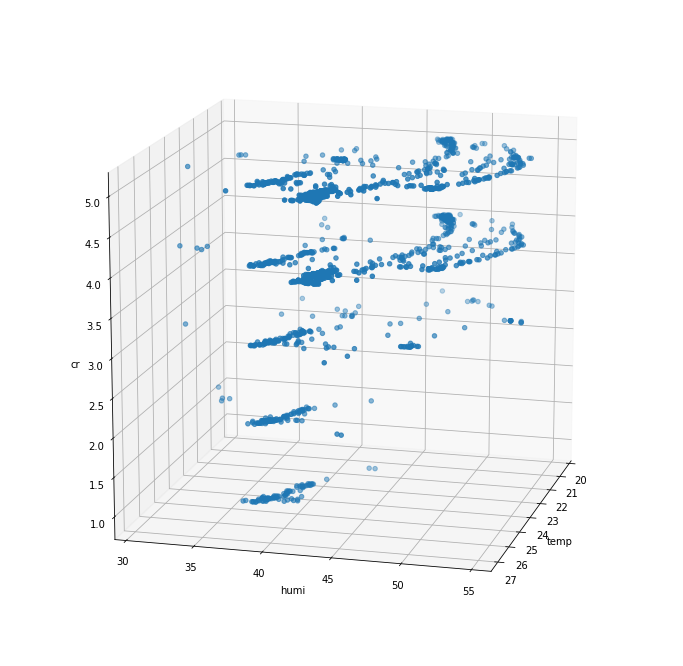

In [11]:
import sklearn.linear_model
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

data = read_csv('iot_data.csv', sep=',')

data = np.array(data, dtype=np.float32)

xs = np.array(data[:,0], dtype=np.float32)
ys = np.array(data[:,1], dtype=np.float32)
zs = np.array(data[:,2], dtype=np.float32)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('temp')
ax.set_ylabel('humi')
ax.set_zlabel('cr')
ax.view_init(15, 15)

plt.show()


In [12]:
import sklearn.linear_model
import numpy as np
from pandas.io.parsers import read_csv
# data split
from sklearn.model_selection import train_test_split

x_data = data[:, 0:-1] # temp, humi

y_data = data[:, [-1]] # cr

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1302, 2)
(1302, 1)
(326, 2)
(326, 1)


In [13]:
# sklearn을 사용한 회귀
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)

print(model)
print('TH&cr [25,43] : ', model.predict([[25,43]]))
print('TH&cr [23,53] : ', model.predict([[23,53]]))
print("train 세트 정확도: {:.2f}".format(model.score(x_train, y_train)))
print("test 세트 정확도: {:.2f}".format(model.score(x_test, y_test)))
print("weigths: ",model.coef_)
print("bias : ",model.intercept_[:,None])
W_ = [[model.coef_[0][0]],[model.coef_[0][1]]]
b_ = np.hstack(model.intercept_[:,None])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
TH&cr [25,43] :  [[3.97665955]]
TH&cr [23,53] :  [[4.85504542]]
train 세트 정확도: 0.13
test 세트 정확도: 0.18
weigths:  [[0.03663888 0.09516636]]
bias :  [[-1.031466]]


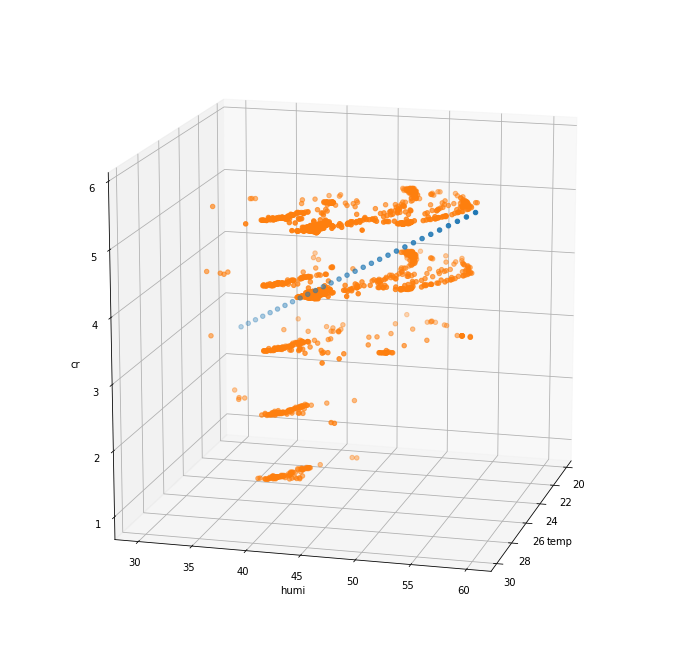

In [14]:
x = np.linspace(20, 30, 30).reshape(30,1) # Temp range(20~30, 간격:30)
y = np.linspace(30, 60, 30).reshape(30,1) # Humi range(30~60, 간격:30)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, Z)
ax.scatter(xs, ys, zs)
ax.set_xlabel('temp')
ax.set_ylabel('humi')
ax.set_zlabel('cr')
ax.view_init(15, 15)

plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# knn(최근접이웃(k-Nearest Neighbors))을 사용한 회귀
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train.ravel())

print(knn)
print('TH&cr [25,43] : ', knn.predict([[25,43]]))
print('TH&cr [23,53] : ', knn.predict([[23,53]]))
print("train 세트 정확도: {:.2f}".format(knn.score(x_train, y_train)))
print("test 세트 정확도: {:.2f}".format(knn.score(x_test, y_test)))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
TH&cr [25,43] :  [4.3333335]
TH&cr [23,53] :  [4.]
train 세트 정확도: 0.53
test 세트 정확도: 0.10


In [17]:
# KNeighborsClassifier 사용 회귀

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.ravel())

print(knn)
print('TH&cr [25,43] : ', knn.predict([[25,43]]))
print('TH&cr [23,53] : ', knn.predict([[23,53]]))
print("train 세트 정확도: {:.2f}".format(knn.score(x_train, y_train)))
print("test 세트 정확도: {:.2f}".format(knn.score(x_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
TH&cr [25,43] :  [4.]
TH&cr [23,53] :  [3.]
train 세트 정확도: 0.67
test 세트 정확도: 0.40


## 선형 회귀 개선 방법: Ridge & Lasso

#### 릿지 회귀 (Ridge regression, L2)

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train.ravel())
print("훈련 세트 점수: {:.2f}".format(ridge.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(x_test, y_test)))
print("weigths: ",ridge.coef_)
print("bias : ",ridge.intercept_)

훈련 세트 점수: 0.13
테스트 세트 점수: 0.18
weigths:  [0.03662178 0.09515925]
bias :  -1.0307341


### 라소 회귀 (Lasso regression, L1)
- 특성의 기여도를 조젏해서 특정 특성의 계수는 0으로 설정된다.
- 회기에 관여하는 특성을 제한해서 오차를 줄이는 방법.

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train.ravel())  # underfitting
print("훈련 세트 점수: {:.2f}".format(lasso.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(x_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))
print("weigths: ",lasso.coef_)
print("bias : ",lasso.intercept_)

훈련 세트 점수: 0.09
테스트 세트 점수: 0.11
사용한 특성의 개수: 1
weigths:  [-0.          0.03951148]
bias :  2.3126497


***

## Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_clf = LogisticRegression(solver='lbfgs',multi_class='auto', max_iter=1000)
log_clf.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
log_clf.score(x_test, y_test)

0.41411042944785276

In [24]:
log_clf.predict(x_test),y_test

(array([5., 5., 5., 5., 5., 4., 5., 5., 4., 5., 5., 5., 1., 5., 5., 5., 4.,
        5., 1., 5., 5., 5., 5., 4., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 4., 4., 1., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5.,
        5., 5., 5., 5., 5., 5., 1., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5.,
        5., 4., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 4., 5., 4., 5.,
        5., 5., 1., 5., 5., 4., 4., 5., 5., 4., 5., 1., 5., 5., 5., 5., 4.,
        5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 4., 5., 5., 4., 5., 5., 5.,
        5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 4., 4., 1., 5., 5.,
        4., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 1.,
        5., 1., 5., 4., 5., 5., 5., 5., 5., 5., 4., 5., 5., 4., 4., 5., 5.,
        5., 5., 4., 5., 5., 5., 4., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        4., 

In [25]:
# 로지스틱 회귀 모델의 정확도(R^2)

print("트레인 세트의 정확도: {:.2f}".format(log_clf.score(x_train, y_train)))
print("테스트 세트의 정확도: {:.2f}".format(log_clf.score(x_test, y_test)))
print("weigths: ",log_clf.coef_)
print("bias : ",log_clf.intercept_)

트레인 세트의 정확도: 0.43
테스트 세트의 정확도: 0.41
weigths:  [[ 0.05433158 -0.33210656]
 [-0.00099514 -0.31913304]
 [-0.13088872  0.09182024]
 [ 0.09185596  0.30131096]
 [-0.01430367  0.2581084 ]]
bias :  [ 11.38983241  12.23917661  -0.56336028 -13.89248903  -9.17315971]


In [0]:
# Compatibility layer between Python 2 and Python 3
from __future__ import print_function
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [0]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 8))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

In [0]:
# Parameters of data
LABELS = ["1", 
          "2", 
          "3", 
          "4",
          "5"]


--- Confusion matrix for test data ---



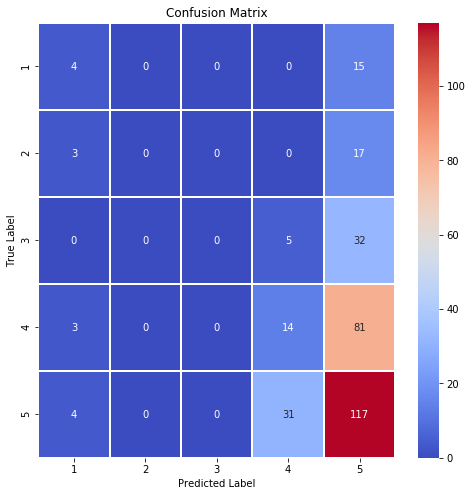



--- Classification report for test data ---

              precision    recall  f1-score   support

         1.0       0.29      0.21      0.24        19
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        37
         4.0       0.28      0.14      0.19        98
         5.0       0.45      0.77      0.57       152

    accuracy                           0.41       326
   macro avg       0.20      0.22      0.20       326
weighted avg       0.31      0.41      0.33       326



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
# Confusion matrix for test data
print("\n--- Confusion matrix for test data ---\n")

y_pred_test = log_clf.predict(x_test)
# Take the class with the highest probability from the test predictions


show_confusion_matrix(y_test, y_pred_test)

# %%

print("\n\n--- Classification report for test data ---\n")

print(classification_report(y_test, y_pred_test))

### 결정 트리

#### 결정 트리 모델과 복잡도 제어하기

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train.ravel())

print("훈련 세트 정확도: {:.3f}".format(tree.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(x_test, y_test)))

훈련 세트 정확도: 0.858
테스트 세트 정확도: 0.408


### 결정 트리의 앙상블
#### 랜덤 포레스트
##### 랜덤 포레스트 분석

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train.ravel())

print("훈련 세트 정확도: {:.3f}".format(forest.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(x_test, y_test)))

훈련 세트 정확도: 0.858
테스트 세트 정확도: 0.439


#### 그래디언트 부스팅 회귀 트리

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train.ravel())

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 0.672
테스트 세트 정확도: 0.414


In [34]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train.ravel())

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 0.502
테스트 세트 정확도: 0.417


### 커널 서포트 벡터 머신
#### 선형 모델과 비선형 특성

In [0]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [36]:
svc = SVC(gamma='auto')
svc.fit(x_train, y_train.ravel())

print("훈련 세트 정확도: {:.2f}".format(svc.score(x_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(x_test, y_test)))

훈련 세트 정확도: 0.50
테스트 세트 정확도: 0.45


### 신경망 (딥러닝)
#### 신경망 모델

In [0]:
from sklearn.neural_network import MLPClassifier

In [38]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(x_train, y_train.ravel())
print("훈련 세트 정확도: {:.2f}".format(mlp.score(x_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(x_test, y_test)))

훈련 세트 정확도: 0.43
테스트 세트 정확도: 0.40


In [39]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train.ravel())
print("훈련 세트 정확도: {:.2f}".format(mlp.score(x_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(x_test, y_test)))

훈련 세트 정확도: 0.42
테스트 세트 정확도: 0.44


In [40]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train.ravel())
print("훈련 세트 정확도: {:.2f}".format(mlp.score(x_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(x_test, y_test)))

훈련 세트 정확도: 0.43
테스트 세트 정확도: 0.47
